# Dividir el dataset en conjunto de entrenamiento y de testing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [4]:
a = np.random.randn(len(data))

(array([  1.,   7.,  12.,  31.,  40.,  44.,  41.,  12.,   7.,   5.]),
 array([-2.70332932, -2.18062127, -1.65791322, -1.13520518, -0.61249713,
        -0.08978908,  0.43291897,  0.95562702,  1.47833506,  2.00104311,
         2.52375116]),
 <a list of 10 Patch objects>)

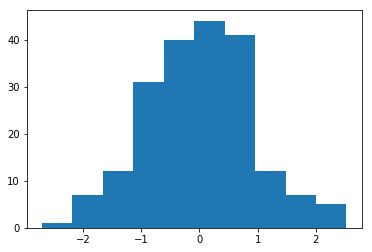

In [5]:
plt.hist(a)

In [7]:
check = (a< 0.8)
training = data[check]
testing = data[~check]

In [8]:
len(training), len(testing)

(160, 40)

In [9]:
import statsmodels.formula.api as smf

In [12]:
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     814.3
Date:                Sun, 05 Aug 2018   Prob (F-statistic):           1.29e-83
Time:                        00:58:03   Log-Likelihood:                -298.30
No. Observations:                 160   AIC:                             602.6
Df Residuals:                     157   BIC:                             611.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9933      0.301      9.936      0.000       2.398       3.588
TV             0.0445      0.001     30.932      0.000       0.042       0.047
Radio          0.1957      0.008     23.203      0.000       0.179       0.212
==============================================================================
Omnibus:                       19.299   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.263
Skew:                          -0.865   Prob(JB):                     1.46e-05
Kurtosis:                       3.589   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.9933 + 0.0445 * TV + 0.1957 * Radio

## Validacion del modelo con el conjunto de testing

In [14]:
sales_pred = lm.predict(testing)
sales_pred

2      12.742477
3      17.822986
20     18.140545
32      7.615444
38     10.138184
39     20.525197
41     17.412443
42     21.489432
43     13.851145
48     16.203446
49      8.262369
56      8.817899
57     12.816362
60      5.767205
65      7.886176
84     20.916749
88     11.916223
89     17.238095
92     19.244510
97     15.337407
99     17.175382
113    16.359088
114    15.635136
115    13.187664
124    19.535144
125     9.185962
126    10.953871
130    10.774686
139    19.819246
141    18.547572
150    18.214109
151    10.025754
161    13.816286
165    14.101690
171    14.409361
173    11.882194
174    13.562840
180    10.475993
191     8.469211
198    23.842804
dtype: float64

In [16]:
SSD =  sum((testing.Sales - sales_pred)**2)
SSD

172.53857249984517

In [18]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

2.159445452461807

In [19]:
sales_mean = np.mean(testing.Sales)
error = RSE / sales_mean
error

0.15432877987935018